# Cerium

In [27]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vice
import paths

## GCE Models

In [28]:
from vice.yields.presets import JW20
from vice.yields.agb import cristallo11

print(vice.yields.ccsne.settings['fe'])
print(vice.yields.agb.settings['ce'])

0.0012
cristallo11


In [29]:
output_dir = paths.data / 'onezone' / 'cerium'
output_dir.mkdir(parents=True, exist_ok=True)

In [30]:
dt = 0.01
tmax = 13.2
simtime = np.arange(0, tmax+dt, dt)

In [31]:
timescale = 15
def ifr(time):
    return m.exp(-time/timescale)

In [32]:
sz = vice.singlezone(
    name=str(output_dir / 'test'),
    func=ifr,
    mode='ifr',
    elements=('fe', 'o', 'ce'),
    eta=2.1,
    # Zin=Zin,
    delay=0.04,
    RIa='exp',
    Mg0=0,
    tau_star=3,
    dt=dt,
    bins=[i*0.01 - 3 for i in range(401)],
)
sz.run(simtime, overwrite=True)

/opt/anaconda3/envs/twoinfall/lib/python3.12/site-packages/vice/core/singlezone/singlezone.py:1797: ScienceWarning: The following elements tracked by this simulation believed to be enriched by the r-process: ce 
In its current version, VICE is not designed to model enrichment via the r-process. These elements will likely be under-abundant in the output.
  return self.__c_version.run(output_times, capture = capture,


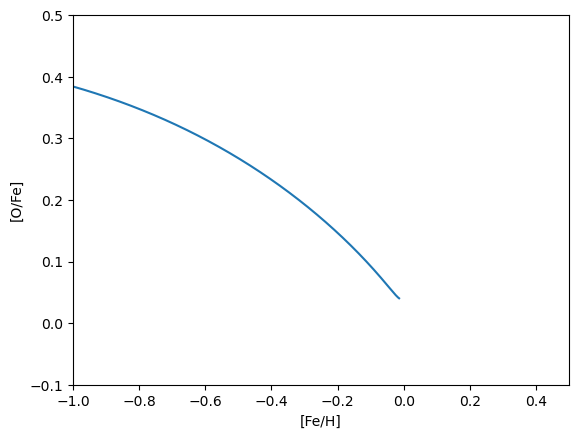

In [33]:
hist = vice.history(str(output_dir / 'test'))

fig, ax = plt.subplots()
ax.plot(hist['[fe/h]'], hist['[o/fe]'])
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_xlim((-1, 0.5))
ax.set_ylim((-0.1, 0.5))
plt.show()

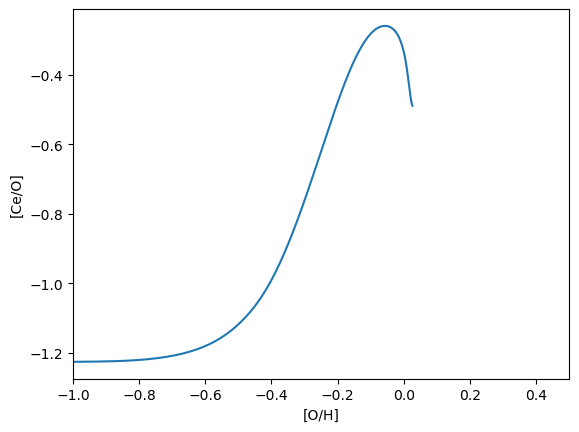

In [34]:
hist = vice.history(str(output_dir / 'test'))

fig, ax = plt.subplots()
ax.plot(hist['[o/h]'], hist['[ce/o]'])
ax.set_xlabel('[O/H]')
ax.set_ylabel('[Ce/O]')
ax.set_xlim((-1, 0.5))
# ax.set_ylim((-0.1, 0.5))
plt.show()